<h1>1. Import Librairies</h1>

In [234]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

<h1>2.Reading the Dataset</h1>

In [235]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<h2>2.1 Checking missing values</h2>

In [236]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

<h1>3. Droping unnecessary columns</h1>

In [237]:
#All values in column "Unnamed: 32" are missing and the "id" column are irrelevant for the rest of our study.
data.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

#check if 'Unnamed:32' variable is removed
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<h1>4. Data Preprocessing</h1>

<h2>4.1 Data Scaling</h2>

In [238]:
#create a Scaling model for Numerical variables 
scaler = StandardScaler()

#select numerical variables
num_features = list(data.columns)
num_features.remove('diagnosis')

#Scaling the numerical variables
data[num_features] = scaler.fit_transform(data[num_features])

#view data after scaling
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


<h2>4.2 Data Encoding</h2>


In [240]:
#Encoding Binary variable 

encoder = LabelEncoder()
data['diagnosis'] = encoder.fit_transform(data['diagnosis'])

<h1>5. Visualization</h1>

<h2>5.1 Pair Plots for the features.</h2> 

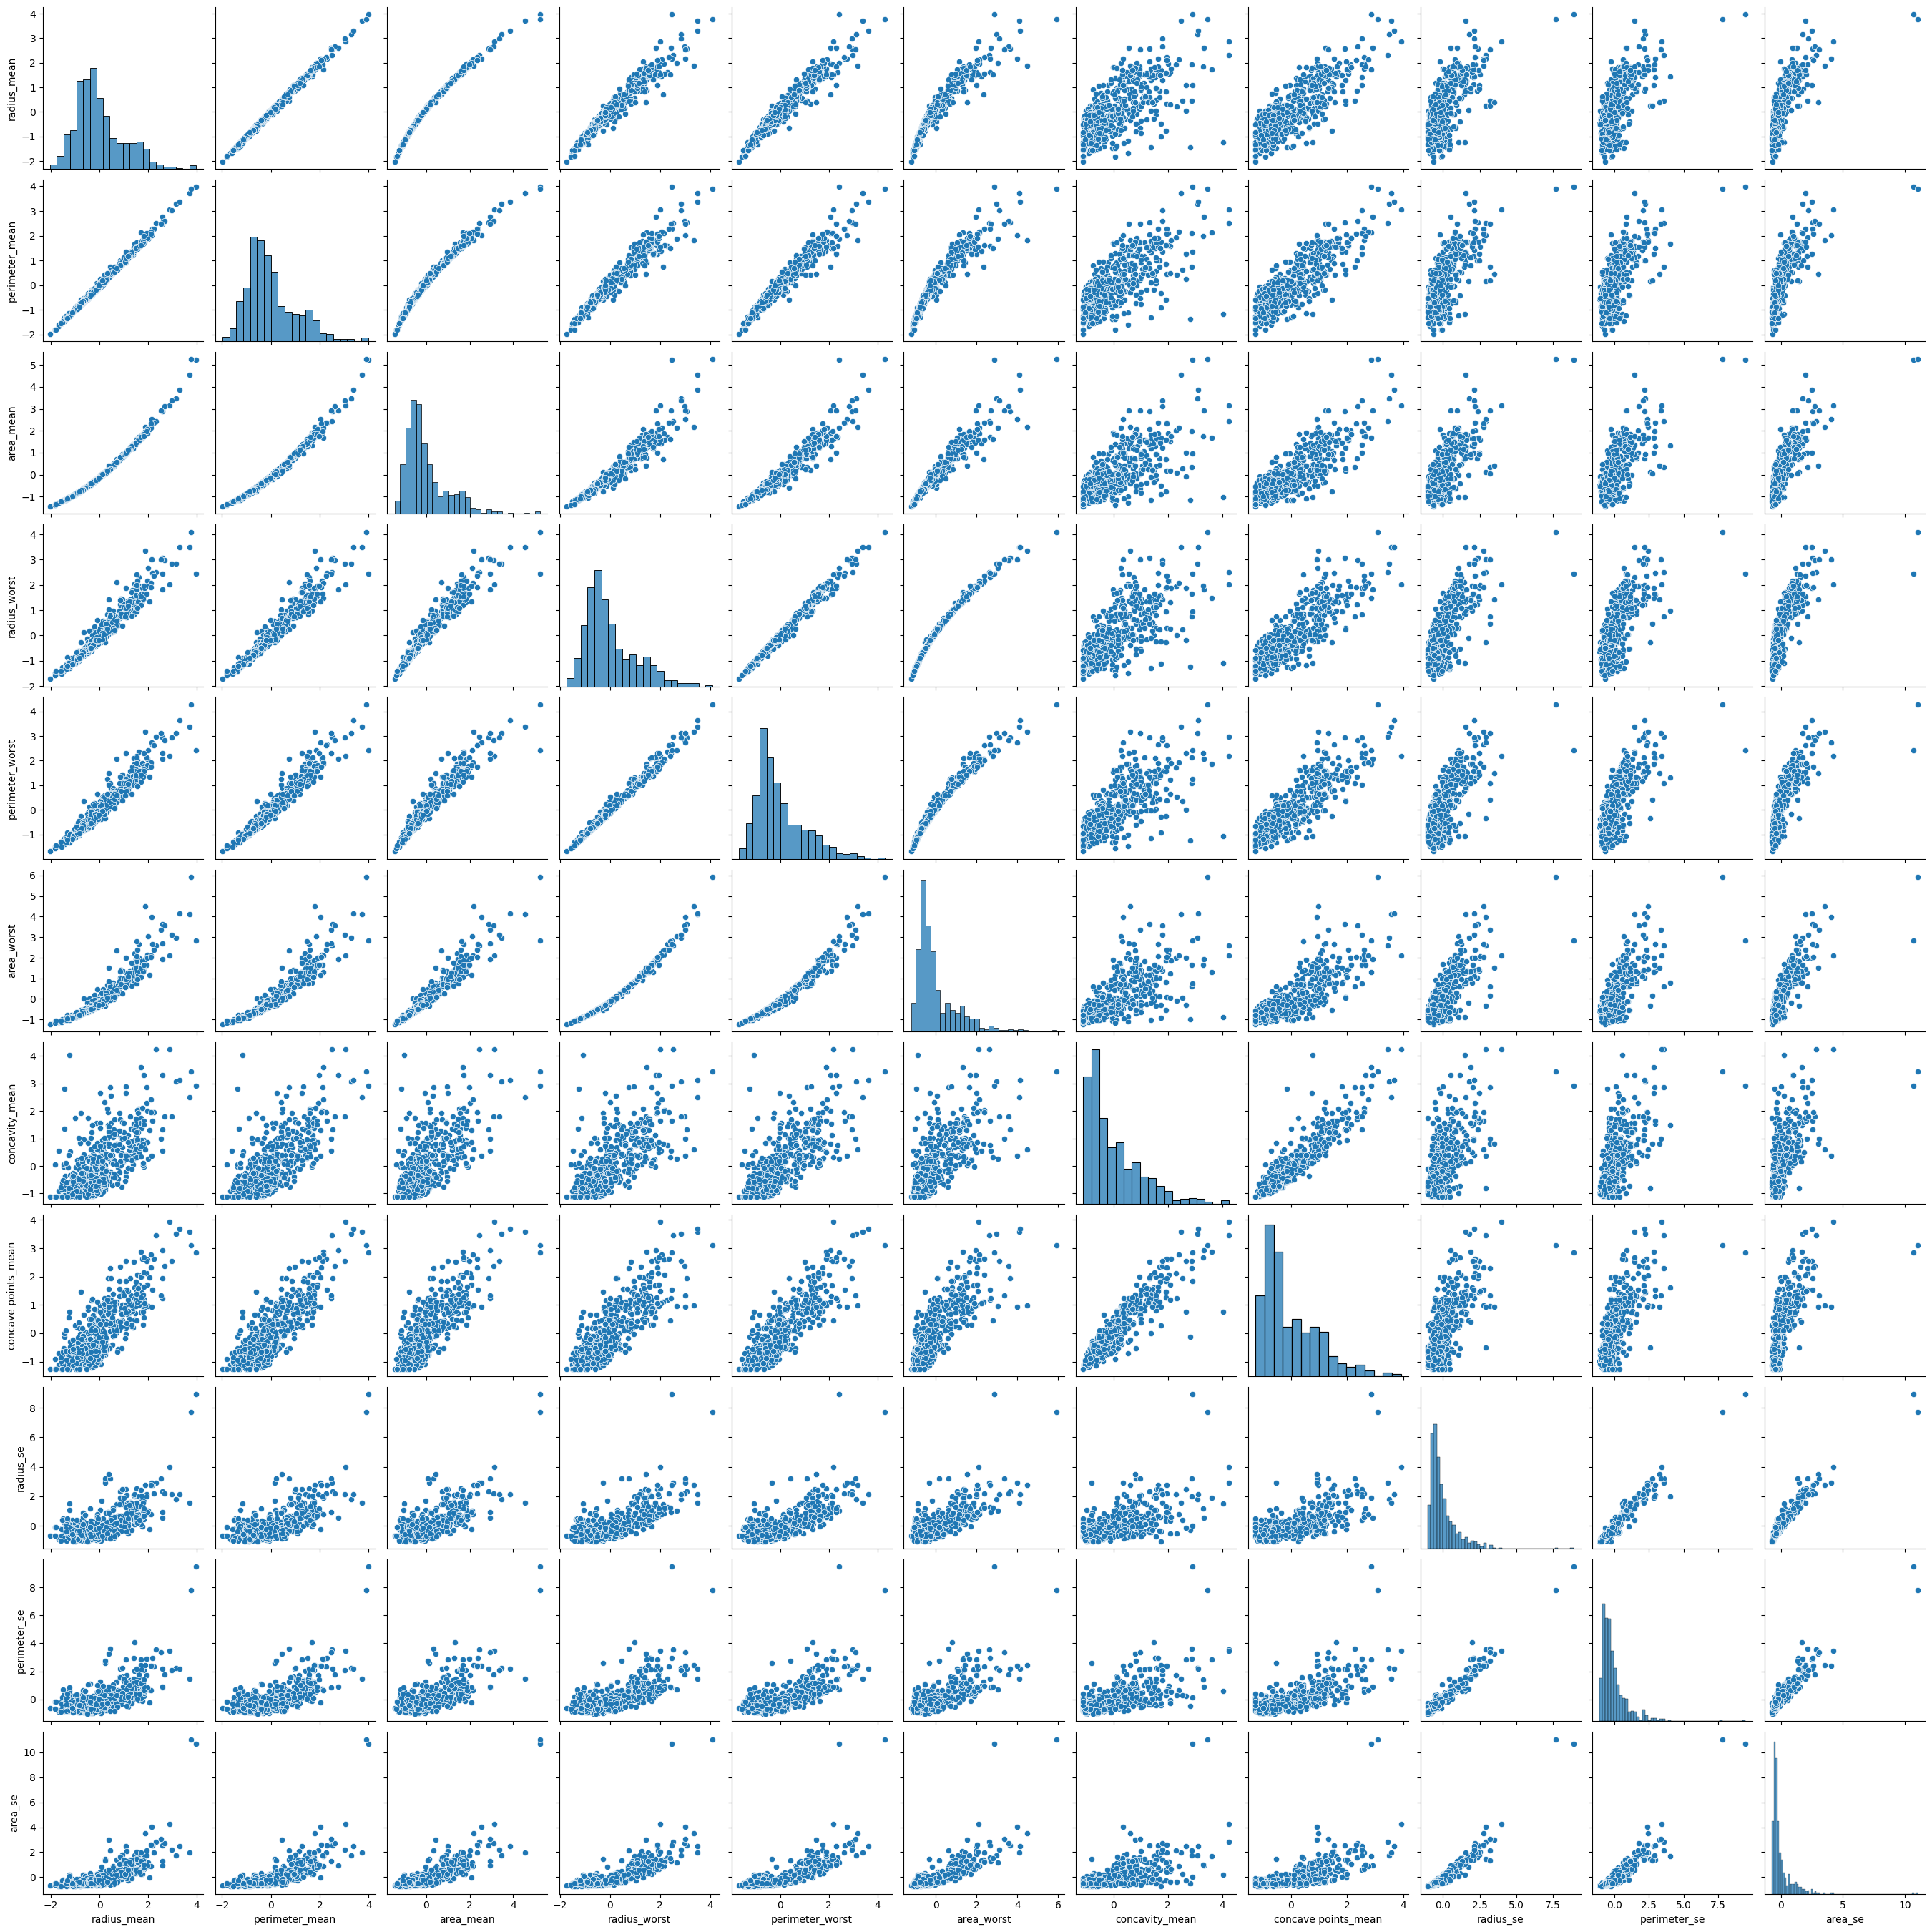

In [241]:
sn.pairplot(data[['radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se']])

<h2>5.2 Correlation Matrix heat map.</h2> 


<Axes: >

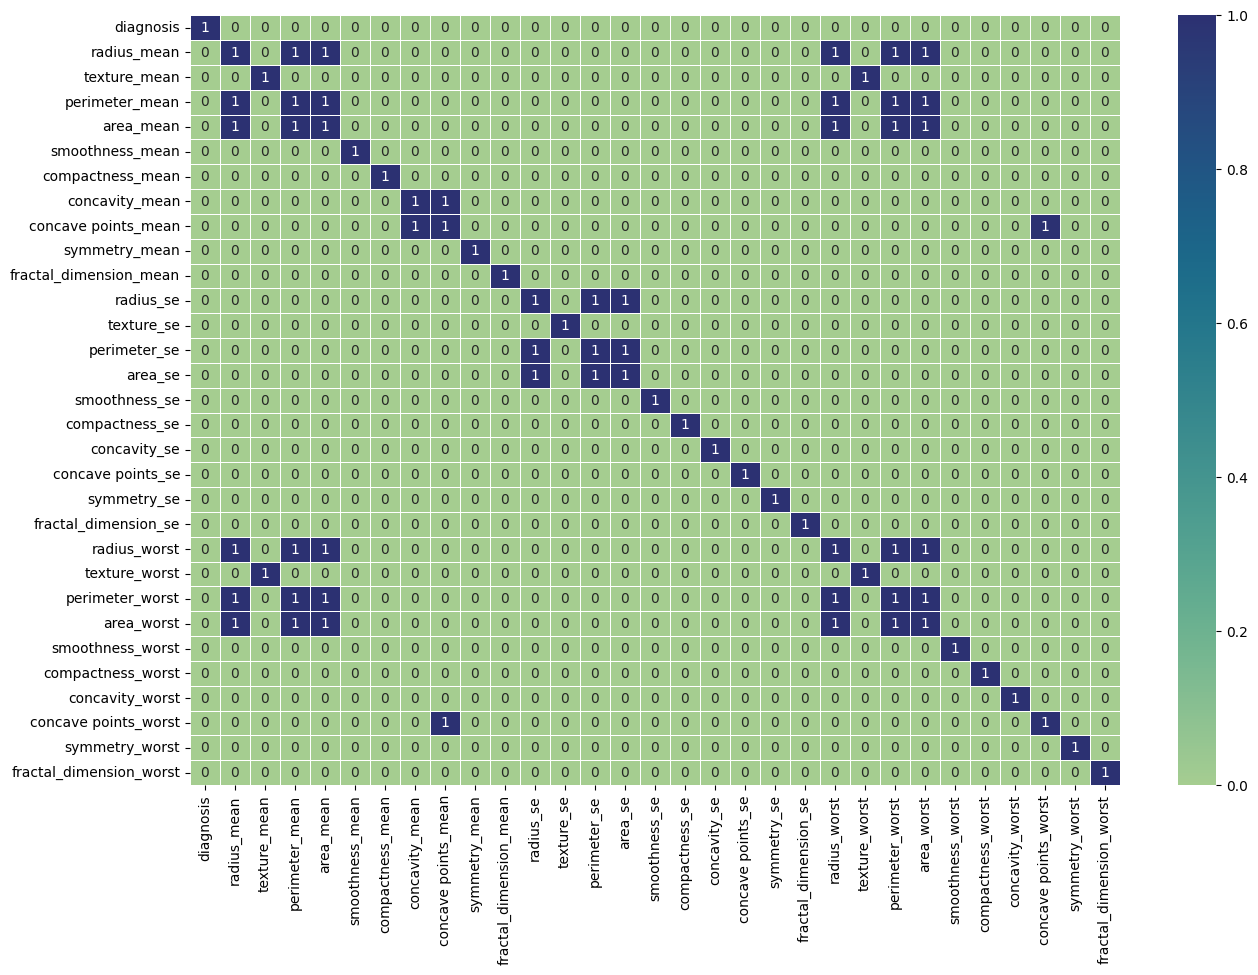

In [242]:
fig, ax = plt.subplots(figsize=(15, 10))
sn.heatmap(data.corr() >= 0.9,annot = True,  linewidth=.5, cmap="crest")

<p>We can conclude, there is high correlation (threshold = 0.9) between:</p>
<ul>
<li>radius_mean, perimeter_mean, area_mean, radius_worst, perimeter_worst, area_worst</li>
<li>texture_mean and texture_worst</li>
<li>concavity_mean and concave points_mean</li>
<li>concave points_mean and concave points_worst</li>
<li>radius_se, perimeter_se, area_se</li>
</ul>
<p>So we can reduce the size of the data by keeping one of the variables having high correlation (Threshold = 0.9):<p>
<table border="1">
        <tr>
            <td>KEEP</td>
            <td>REMOVE</td>
        </tr>
        <tr>
            <td>radius_mean</td>
            <td>perimeter_mean, area_mean, radius_worst, perimeter_worst, area_worst</td>
        </tr>
        <tr>
            <td>texture_mean</td>
            <td>texture_worst</td>
        </tr>
        <tr>
            <td>concavity_mean</td>
            <td>concave points_mean</td>
        </tr>
        <tr>
            <td>radius_se</td>
            <td>perimeter_se, area_se</td>
        </tr>
    </table>


<h2>53. drop features having high correlation with threshold = 0.9</h2>

In [243]:
data.drop(columns = ['perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'texture_worst', 'concave points_mean', 'perimeter_se', 'area_se'], inplace = True)

<h2>5.4 Box plots for the features.</h2> 

<Axes: >

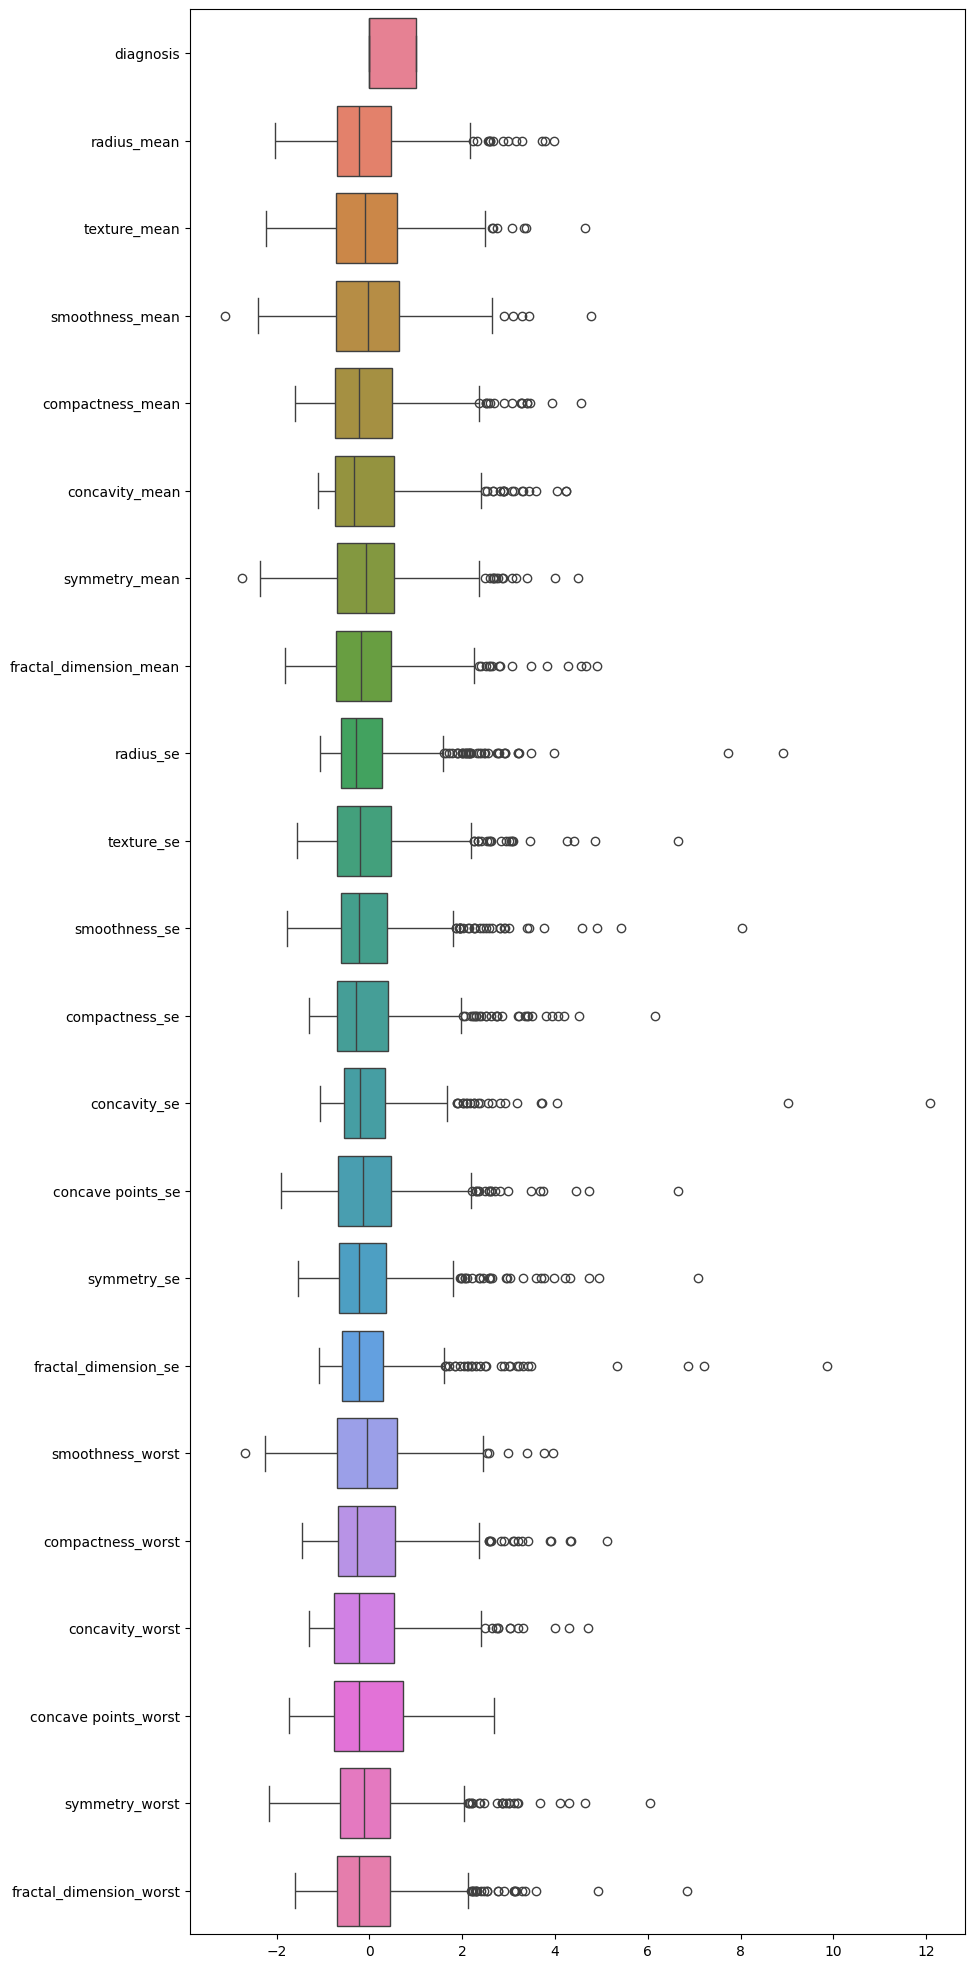

In [244]:
#box plots show in five points and outliers
fig, ax = plt.subplots(figsize=(10, 25))
sn.boxplot(data, orient = "h")

<h2>5.5 Violin plot</h2>

<Axes: >

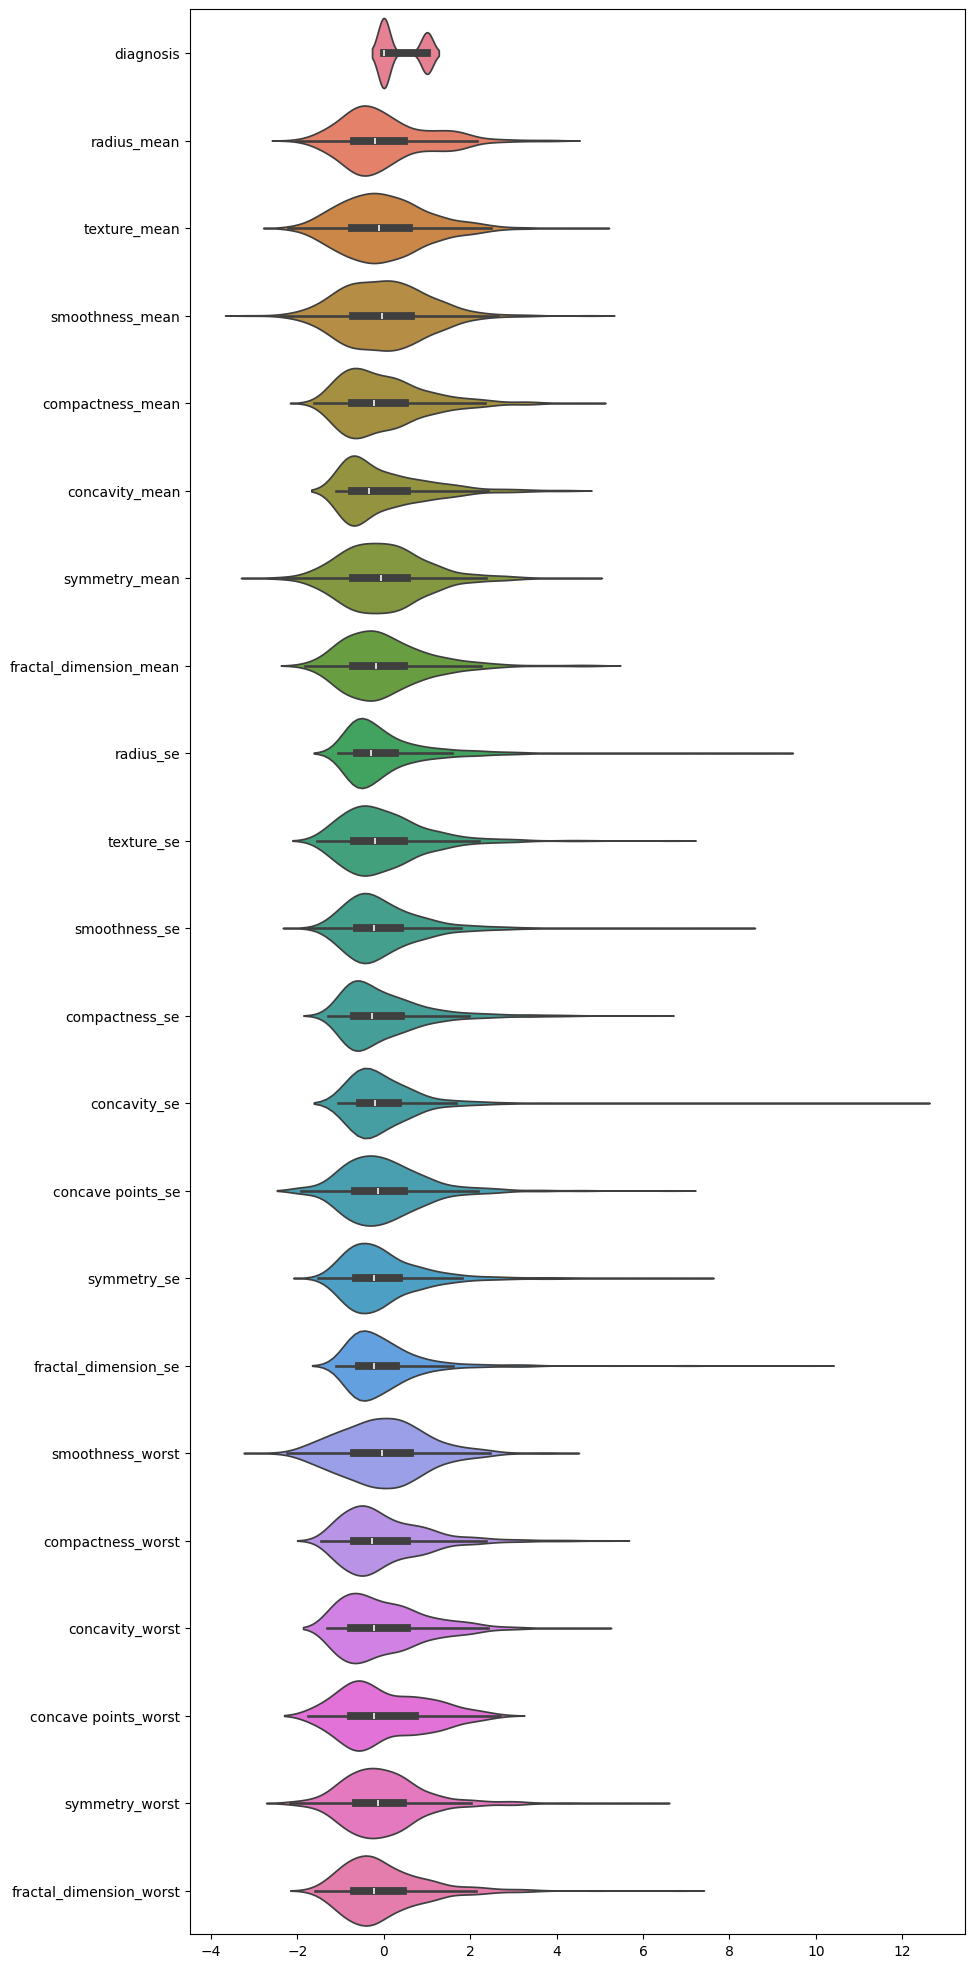

In [245]:
#violin plot show five points and outliers
fig, ax = plt.subplots(figsize=(10, 25))
sn.violinplot(data, orient = "h")

<p>We can conclude many variables have outliers that need to be removed before any process on the data, but if we remove outliers with threshold = 1.5, more than 75% of the data are gone</p>

<h1>Download the refined data as data_refined.csv</h1>

In [246]:
#use write method to download the data
data.to_csv('data_refined.csv', index=False)


In [247]:
#cheking if we can reuse it later
data_ref = pd.read_csv('data_refined.csv')
data_ref.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.568466,3.283515,2.652874,2.217515,2.255747,2.489734,-0.565265,...,0.724026,0.660820,1.148757,0.907083,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,-0.826962,-0.487072,-0.023846,0.001392,-0.868652,0.499255,-0.876244,...,-0.440780,0.260162,-0.805450,-0.099444,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,0.942210,1.052926,1.363478,0.939685,-0.398008,1.228676,-0.780083,...,0.213076,1.424827,0.237036,0.293559,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,3.283553,3.402909,1.915897,2.867383,4.910919,0.326373,-0.110409,...,0.819518,1.115007,4.732680,2.047511,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,0.280372,0.539340,1.371011,-0.009560,-0.562450,1.270543,-0.790244,...,0.828471,1.144205,-0.361092,0.499328,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
